In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [51]:
datas = {
    'name': ['salma', 'meysam', 'sajad', 'koroshi', 'fatemeh', 'Ali.tabrizi', '02:41', 'sina', 'maman', 'amirhoseyn', 'amirali',
             'newman', 'setila','ronak', 'F.somaye','ghazaleh', 'sharare','mahsa','raha'],
    "age": [29, 30, 21, 22, 21, 25, 22, 21, 48, 20, 20, 20, 20, 17, 27, 22, 29, 23, 20],
    'weight': [76, 120, 70, 70, 48, 65, 67, 72, 71, 62, 65, 66, 50, 55, 75, 68, 62, 61, 56],
    'footsize': [37, 46, 42, 43, 38, 40, 42, 34, 37, 41, 40, 41, 38, 39, 39, 49, 38, 39, 39],
    'height': [156, 183, 175, 175, 168, 176, 188, 174, 160, 174, 175, 179, 163, 164, 169, 175, 168, 168, 168]
}

df=pd.DataFrame(datas)
df

,name,age,weight,footsize,height
0,salma,29,76,37,156
1,meysam,30,120,46,183
2,sajad,21,70,42,175
3,koroshi,22,70,43,175
4,fatemeh,21,48,38,168
5,Ali.tabrizi,25,65,40,176
6,02:41,22,67,42,188
7,sina,21,72,34,174
8,maman,48,71,37,160
9,amirhoseyn,20,62,41,174


In [24]:
df.describe()

,age,weight,footsize,height
count,19.000000,19.000000,19.000000,19.000000
mean,24.052632,67.315789,40.105263,171.473684
std,6.835152,14.948254,3.381235,7.812870
min,17.000000,48.000000,34.000000,156.000000
25%,20.000000,61.500000,38.000000,168.000000
50%,22.000000,66.000000,39.000000,174.000000
75%,26.000000,70.500000,41.500000,175.000000
max,48.000000,120.000000,49.000000,188.000000


In [25]:
df.head()

,name,age,weight,footsize,height
0,salma,29,76,37,156
1,meysam,30,120,46,183
2,sajad,21,70,42,175
3,koroshi,22,70,43,175
4,fatemeh,21,48,38,168


In [56]:
cdf = df[['age', 'weight', 'footsize', 'height']]
cdf.head()

,age,weight,footsize,height
0,29,76,37,156
1,30,120,46,183
2,21,70,42,175
3,22,70,43,175
4,21,48,38,168


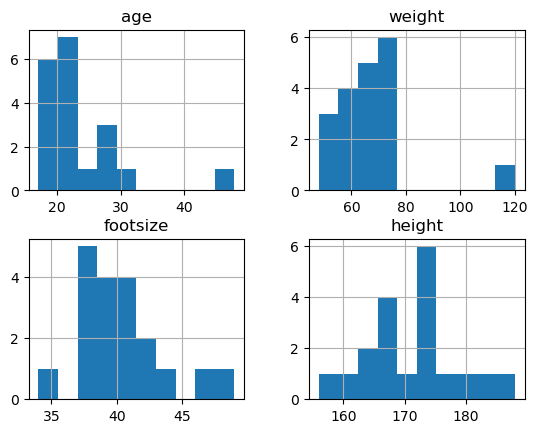

In [28]:
viz = cdf[['age', 'weight', 'footsize', 'height']]
viz.hist()
plt.show()

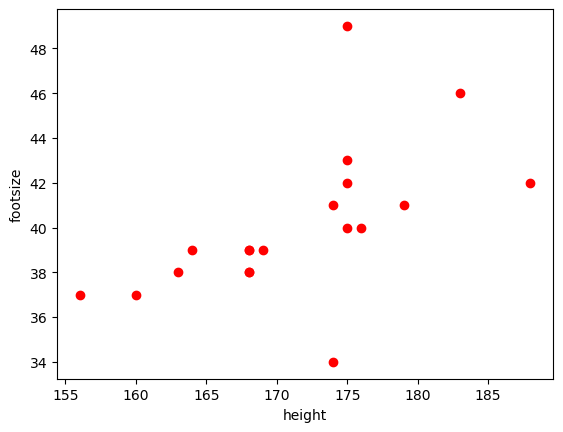

In [31]:
plt.scatter(cdf.height, cdf.footsize, color='red')
plt.xlabel("height")
plt.ylabel("footsize")
plt.show()

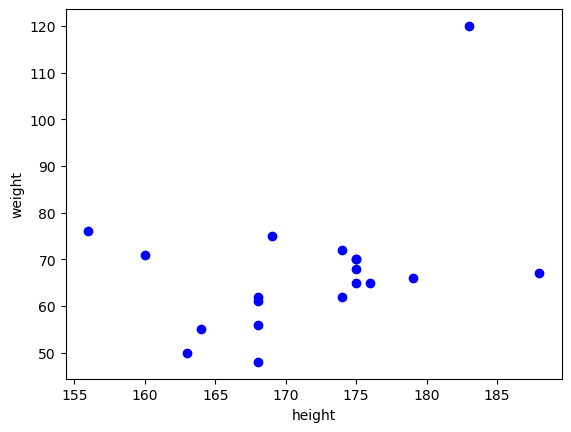

In [34]:
plt.scatter(cdf.height, cdf.weight, color='blue')
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

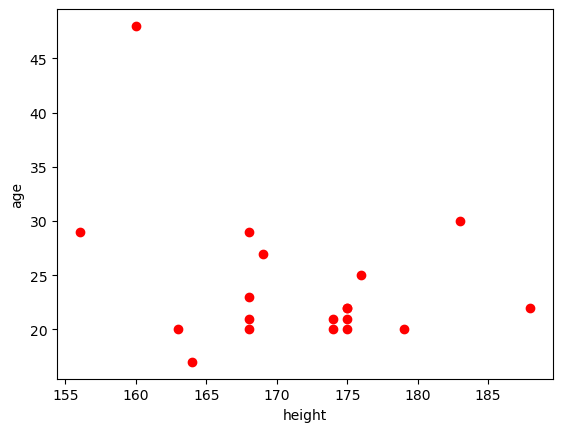

In [36]:
plt.scatter(cdf.height, cdf.age, color='red')
plt.xlabel("height")
plt.ylabel("age")
plt.show()

In [45]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print (train)
print (test)
print (msk)
print (~msk)

    age  weight  footsize  height
0    29      76        37     156
2    21      70        42     175
3    22      70        43     175
4    21      48        38     168
5    25      65        40     176
6    22      67        42     188
7    21      72        34     174
9    20      62        41     174
11   20      66        41     179
12   20      50        38     163
13   17      55        39     164
14   27      75        39     169
16   29      62        38     168
17   23      61        39     168
    age  weight  footsize  height
1    30     120        46     183
8    48      71        37     160
10   20      65        40     175
15   22      68        49     175
18   20      56        39     168
[ True False  True  True  True  True  True  True False  True False  True
  True  True  True False  True  True False]
[False  True False False False False False False  True False  True False
 False False False  True False False  True]


In [59]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['footsize']])
train_y = np.asanyarray(train[['height']])
regr.fit(train_x, train_y)

print('Coeficient: ', regr.coef_)
print('Intercept', regr.intercept_)

Coeficient:  [[1.82926829]]
Intercept [99.2195122]


Text(0, 0.5, 'height')

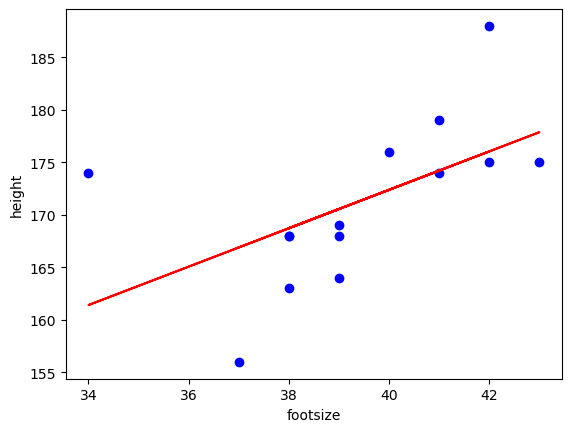

In [64]:
plt.scatter(train_x, train_y, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("footsize")
plt.ylabel("height")

In [68]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["footsize"]])
test_y = np.asanyarray(test[["height"]])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 5.26
Residual sum of squares (MSE): 50.61
R2-score: 0.15
